In [1]:
#%matplotlib notebook

In [2]:
import matplotlib.pyplot as plt
import pandas as pd
import numpy as np
import scipy.stats as st

In [3]:
#Importing files
mouse_data = "../../../working/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Mouse_metadata.csv"
study_results = "../../../working/05-Matplotlib/Homework/Instructions/Pymaceuticals/data/Study_results.csv"

mouse_data_df = pd.read_csv(mouse_data)
study_results_df = pd.read_csv(study_results)

In [4]:
#Mouse data DataFrame
mouse_data_df.head()

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g)
0,k403,Ramicane,Male,21,16
1,s185,Capomulin,Female,3,17
2,x401,Capomulin,Female,16,15
3,m601,Capomulin,Male,22,17
4,g791,Ramicane,Male,11,16


In [5]:
#Study Results DataFrame
study_results_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites
0,b128,0,45.0,0
1,f932,0,45.0,0
2,g107,0,45.0,0
3,a457,0,45.0,0
4,c819,0,45.0,0


In [6]:
#Merging our two dataframes
merge_df = pd.merge(mouse_data_df, study_results_df, on = "Mouse ID")
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


In [7]:
#Finding the duplicated row
duplicated_row = merge_df[merge_df.duplicated(keep = False)]
duplicated_row

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
908,g989,Propriva,Female,21,26,0,45.0,0
909,g989,Propriva,Female,21,26,0,45.0,0


In [8]:
#Deleting the duplicated row from our dataframe
merge_df = merge_df.drop(908)
merge_df = merge_df.drop(909)
merge_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
1888,z969,Naftisol,Male,9,30,25,63.145652,2
1889,z969,Naftisol,Male,9,30,30,65.841013,3
1890,z969,Naftisol,Male,9,30,35,69.176246,4
1891,z969,Naftisol,Male,9,30,40,70.314904,4


# Summary Statistics Table

In [9]:
#Calculating mean of tumor volume
mean_vol = merge_df['Tumor Volume (mm3)'].mean()
mean_vol

50.45414306457959

In [10]:
#Calculating median of tumor volume
median_vol = merge_df['Tumor Volume (mm3)'].median()
median_vol


48.95791906

In [11]:
#Calculating variance of tumor volume
var_vol = merge_df.var()['Tumor Volume (mm3)']
var_vol

79.16834895592136

In [12]:
#Calculating standard deviation of tumor volume
std_vol = merge_df.std()['Tumor Volume (mm3)']
std_vol

8.89765974601869

In [13]:
#Calculating SEM of tumor volume
sem_vol = merge_df.sem()['Tumor Volume (mm3)']
sem_vol

0.20461149544872292

In [14]:
#Creating summary statistics table for tumor volume

summary_stats_df = pd.DataFrame(
    {"Mean of Tumor Volume": [mean_vol],
     "Median of Tumor Volume": [median_vol],
     "Variance of Tumor Volume": [var_vol],
     "Standard Deviation of Tumor Volume": [std_vol],
     "SEM of Tumor Volume": [sem_vol]
    }
)

summary_stats_df.head()

,Mean of Tumor Volume,Median of Tumor Volume,Variance of Tumor Volume,Standard Deviation of Tumor Volume,SEM of Tumor Volume
0,50.454143,48.957919,79.168349,8.89766,0.204611


# Bar Plot: Total Measurements for Regimens 

In [15]:
#labels = [merge_df["Sex"], ]
#loc male and loc female?
#x_val = merge_df['Drug Regimen'].value_counts()
#y_val = merge_df['Mouse ID'].value_counts()
#x_val
#plt.bar(x_val, y_val)

Text(0, 0.5, 'Number of Measurements')

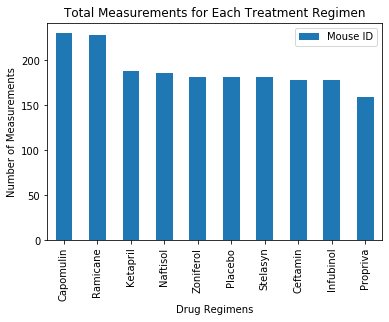

In [19]:
#Creating bar graph using Pandas to show total number of measurements taken for each treatment regimen

#Creating a new data frame with only the Mouse ID and Drug Regimen columns
mouse_drug_df = merge_df[['Mouse ID', 'Drug Regimen']]

#Calculating total number of measurements per drug regimen
mouse_drug_df = mouse_drug_df.groupby('Drug Regimen').count()

#Sorting our dataframe from highest number of measurements to lowest
mouse_drug_df = mouse_drug_df.sort_values(by = 'Mouse ID', ascending = False)

#Creating bar graph based on our dataframe
mouse_drug_df.plot.bar()

#Placing title and axis titles 
plt.title("Total Measurements for Each Treatment Regimen")
plt.xlabel("Drug Regimens")
plt.ylabel("Number of Measurements")

<BarContainer object of 10 artists>

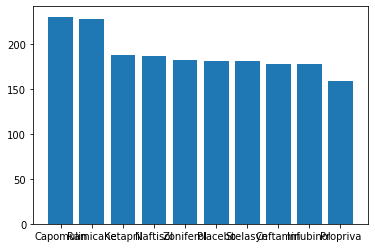

In [20]:
#Plotting with Matplotlib

plt.bar(mouse_drug_df.index.values, mouse_drug_df["Mouse ID"])

# Pie Plot Based on Gender of Mouse

In [21]:
#Creating pie chart that shows distribution of female and male mice in the study using Pandas

#Creating a new dataframe that groups merge_df by "Sex"
groupby_gender_df = merge_df.groupby(['Sex'])

#Counting the number of female mice and male mice 
gender_count = groupby_gender_df.count()

(-1.1048958498515298,
 1.100233161810833,
 -1.102935641318436,
 1.1056031302324567)

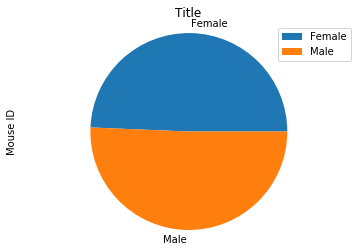

In [22]:
#Creating a pie chart using Pandas
var = gender_count.plot(kind = "pie", y = "Mouse ID", title = ("Title"))
plt.axis("equal")

In [27]:
gender_count.head()

,Mouse ID,Drug Regimen,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
Sex,,,,,,,
Female,933,933,933,933,933,933,933
Male,958,958,958,958,958,958,958


([<matplotlib.patches.Wedge at 0x7fa17fd49ba8>,
 [Text(0.022841723306029415, 1.0997628179186687, 'Female'),
  Text(-0.022841620338803076, -1.0997628200572604, 'Male')],
 [Text(0.01245912180328877, 0.5998706279556374, '49.3%'),
  Text(-0.01245906563934713, -0.599870629122142, '50.7%')])

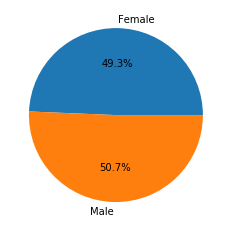

In [32]:
#Creating pie chart that shows distribution of female and male mice in the study using Matplotlibs
plt.pie(gender_count['Mouse ID'], labels = gender_count.index, autopct="%1.1f%%")

# Quartiles, Outliers, and Boxplots

In [34]:
#Calculating final tumor volume across for most promising treatments: Capomulin, Ramicane, Infubinol, and Ceftamin

#Looking at data for Capomulin
capomulin_df = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [43]:
#Finding highest value in "Timepoint"
max_timepoint_cap = capomulin_df.loc[capomulin_df["Timepoint"].idxmax()]
max_timepoint_cap

Mouse ID                   s185
Drug Regimen          Capomulin
Sex                      Female
Age_months                    3
Weight (g)                   17
Timepoint                    45
Tumor Volume (mm3)      23.3436
Metastatic Sites              1
Name: 19, dtype: object

In [51]:
#Final tumor volume for Capomulin
max_tumor_cap = max_timepoint_cap["Tumor Volume (mm3)"]

In [52]:
#Looking at data for Ramicane
ramicane_df = merge_df.loc[merge_df["Drug Regimen"] == "Ramicane"]
ramicane_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
0,k403,Ramicane,Male,21,16,0,45.000000,0
1,k403,Ramicane,Male,21,16,5,38.825898,0
2,k403,Ramicane,Male,21,16,10,35.014271,1
3,k403,Ramicane,Male,21,16,15,34.223992,1
4,k403,Ramicane,Male,21,16,20,32.997729,1
...,...,...,...,...,...,...,...,...
449,w678,Ramicane,Female,5,24,5,43.166373,0
450,y449,Ramicane,Male,19,24,0,45.000000,0
451,y449,Ramicane,Male,19,24,5,45.877545,0
452,y449,Ramicane,Male,19,24,10,46.378092,0


In [48]:
#Finding highest value in "Timepoint" for Ramicane
max_timepoint_ram = ramicane_df.loc[ramicane_df["Timepoint"].idxmax()]
max_timepoint_ram

Mouse ID                  k403
Drug Regimen          Ramicane
Sex                       Male
Age_months                  21
Weight (g)                  16
Timepoint                   45
Tumor Volume (mm3)     22.0501
Metastatic Sites             1
Name: 9, dtype: object

In [53]:
#Final tumor volume for Ramicane
max_tumor_ram = max_timepoint_ram["Tumor Volume (mm3)"]
max_tumor_ram

22.05012627

In [55]:
#Looking at data for Infubinol
infubinol_df = merge_df.loc[merge_df["Drug Regimen"] == "Infubinol"]
infubinol_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
454,a203,Infubinol,Female,20,23,0,45.000000,0
455,a203,Infubinol,Female,20,23,5,48.508468,0
456,a203,Infubinol,Female,20,23,10,51.852437,1
457,a203,Infubinol,Female,20,23,15,52.777870,1
458,a203,Infubinol,Female,20,23,20,55.173336,1
...,...,...,...,...,...,...,...,...
1868,z581,Infubinol,Female,24,25,25,54.316407,2
1869,z581,Infubinol,Female,24,25,30,56.286750,2
1870,z581,Infubinol,Female,24,25,35,58.628399,3
1871,z581,Infubinol,Female,24,25,40,60.053740,3


In [56]:
#Finding highest value in "Timepoint" for Infubinol
max_timepoint_inf = infubinol_df.loc[infubinol_df["Timepoint"].idxmax()]
max_timepoint_inf

Mouse ID                   a203
Drug Regimen          Infubinol
Sex                      Female
Age_months                   20
Weight (g)                   23
Timepoint                    45
Tumor Volume (mm3)      67.9734
Metastatic Sites              2
Name: 463, dtype: object

In [57]:
#Final tumor volume for Infubinol
max_tumor_inf = max_timepoint_inf["Tumor Volume (mm3)"]
max_tumor_inf

67.97341878

In [59]:
#Looking at data for Ceftamin
ceftamin_df = merge_df.loc[merge_df["Drug Regimen"] == "Ceftamin"]
ceftamin_df

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
484,a275,Ceftamin,Female,20,28,0,45.000000,0
485,a275,Ceftamin,Female,20,28,5,46.795257,0
486,a275,Ceftamin,Female,20,28,10,47.371343,0
487,a275,Ceftamin,Female,20,28,15,49.734404,0
488,a275,Ceftamin,Female,20,28,20,50.513437,1
...,...,...,...,...,...,...,...,...
1851,y865,Ceftamin,Male,23,26,25,57.173538,2
1852,y865,Ceftamin,Male,23,26,30,59.033275,3
1853,y865,Ceftamin,Male,23,26,35,61.153140,3
1854,y865,Ceftamin,Male,23,26,40,63.469549,3


In [60]:
#Finding highest value in "Timepoint" for Ceftamin
max_timepoint_ceft = ceftamin_df.loc[ceftamin_df["Timepoint"].idxmax()]
max_timepoint_ceft

Mouse ID                  a275
Drug Regimen          Ceftamin
Sex                     Female
Age_months                  20
Weight (g)                  28
Timepoint                   45
Tumor Volume (mm3)     62.9994
Metastatic Sites             3
Name: 493, dtype: object

In [74]:
#Final tumor volume for Ceftamin
max_tumor_ceft = max_timepoint_ceft["Tumor Volume (mm3)"]
max_tumor_ceft

62.99935619

In [75]:
#Create a series with all the final tumor volumes
final_tumor_volumes = pd.Series([max_tumor_cap, max_tumor_ram, max_tumor_inf, max_tumor_ceft])
final_tumor_volumes

0    23.343598
1    22.050126
2    67.973419
3    62.999356
dtype: float64

In [82]:
#Creating quartiles
quartiles = final_tumor_volumes.quantile([.25,.5,.75])
quartiles

0.25    23.020230
0.50    43.171477
0.75    64.242872
dtype: float64

In [85]:
#Finding the IQR
lowerq = quartiles[0.25]
upperq = quartiles[0.75]
iqr = upperq-lowerq
iqr

41.22264186749999

In [87]:
#Finding upper bound and lower bound

#These don't seem right, come back to this 
lower_bound = lowerq - (1.5*iqr)
upper_bound = upperq + (1.5*iqr)
print(lower_bound)
print(upper_bound)

-38.81373283124998
126.07683463874997


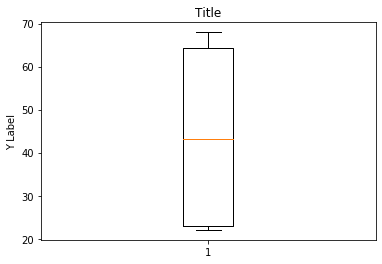

In [89]:
#Generating box and whisker plot of final volume for all four treatment regimens 
fig1, ax1 = plt.subplots()
ax1.set_title('Title')
ax1.set_ylabel('Y Label')
ax1.boxplot(final_tumor_volumes)
plt.show()

# Mouse Treated with Capomulin Line Plot

In [78]:
#Looking for which mice were treated with Capomulin
capomulin_data = merge_df.loc[merge_df["Drug Regimen"] == "Capomulin"]
capomulin_data

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
10,s185,Capomulin,Female,3,17,0,45.000000,0
11,s185,Capomulin,Female,3,17,5,43.878496,0
12,s185,Capomulin,Female,3,17,10,37.614948,0
13,s185,Capomulin,Female,3,17,15,38.177232,0
14,s185,Capomulin,Female,3,17,20,36.866876,0
...,...,...,...,...,...,...,...,...
440,i557,Capomulin,Female,1,24,45,47.685963,1
1452,r157,Capomulin,Male,22,25,0,45.000000,0
1453,r157,Capomulin,Male,22,25,5,45.597064,0
1454,r157,Capomulin,Male,22,25,10,46.059608,0


In [79]:
#Information on chosen mouse
cap_mouse = merge_df.iloc[440, :]
cap_mouse

Mouse ID                   i557
Drug Regimen          Capomulin
Sex                      Female
Age_months                    1
Weight (g)                   24
Timepoint                    45
Tumor Volume (mm3)       47.686
Metastatic Sites              1
Name: 440, dtype: object

In [80]:
mouse_info = merge_df.loc[merge_df["Mouse ID"] == "i557"]
mouse_info

,Mouse ID,Drug Regimen,Sex,Age_months,Weight (g),Timepoint,Tumor Volume (mm3),Metastatic Sites
431,i557,Capomulin,Female,1,24,0,45.000000,0
432,i557,Capomulin,Female,1,24,5,42.261665,0
433,i557,Capomulin,Female,1,24,10,42.992077,0
434,i557,Capomulin,Female,1,24,15,43.529876,0
435,i557,Capomulin,Female,1,24,20,43.967895,0
436,i557,Capomulin,Female,1,24,25,44.596219,0
437,i557,Capomulin,Female,1,24,30,45.261384,0
438,i557,Capomulin,Female,1,24,35,45.941949,0
439,i557,Capomulin,Female,1,24,40,46.821070,1
440,i557,Capomulin,Female,1,24,45,47.685963,1


In [46]:
x_axis = cap_mouse['Timepoint']
y_axis = cap_mouse['Tumor Volume (mm3)']
x_axis

45

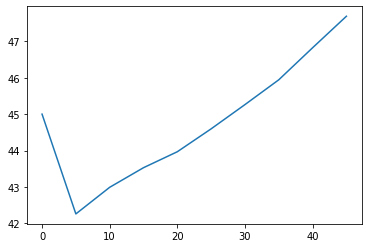

In [51]:
plt.plot(mouse_info["Timepoint"], mouse_info["Tumor Volume (mm3)"])